# Aprimoramento dos Modelos

Nesta etapa, estudaremos maneiras de aprimorar os resultados obtidos pelos modelos, realizando mudanças nos dados e explorando ajuste dos modelos.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

In [2]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [3]:
df = pd.read_csv("dados_tratados.csv", header=0)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Seller_Type_Dealer,Seller_Type_Individual,Novo,Usado,Ano
0,3.35,5.59,27000,0,1,0,1,1,0,1,0,2014
1,4.75,9.54,43000,1,0,0,1,1,0,1,0,2013
2,7.25,9.85,6900,0,1,0,1,1,0,1,0,2017
3,2.85,4.15,5200,0,1,0,1,1,0,1,0,2011
4,4.60,6.87,42450,1,0,0,1,1,0,1,0,2014


Primeiramente, vimos na etapa anterior que uma característica importante para os modelos foi a coluna de quilometragem dos carros, uma forma de torma mais legível esta informação pode ser transformando ela em colunas binárias, separando as quilometragens em faixas.

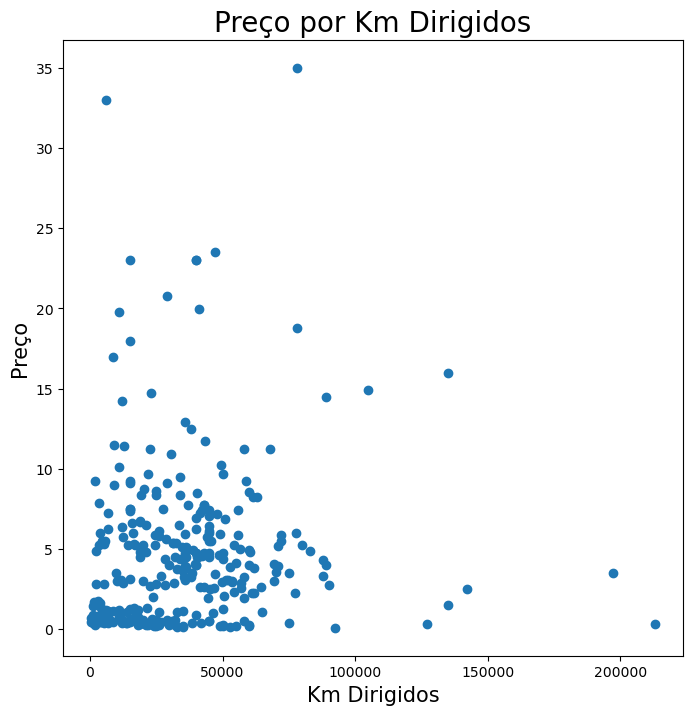

In [162]:
plt.figure(figsize=(8,8))
plt.scatter(df["Kms_Driven"], df["Selling_Price"] )
plt.title("Preço por Km Dirigidos", fontsize=20)
plt.xlabel("Km Dirigidos", fontsize=15)
plt.ylabel("Preço", fontsize=15)
plt.show()

Vemos que temos valores de quilometragem de 0 a aproximadamente 200000, porém,  para valores maiores de 125000Km obtemos praticamente a mesma faixa de preço, então iremos separar em classes de 10000km os carros entre 0 a 125000km rodados. 

In [4]:
faixas = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 300000]
nomes_faixas = ['0-10k', '10k-20k', '20k-30k', '30k-40k', '40k-50k', '50k-60k', '60k-70k', '70k-80k',
                '80k-90k', '90k-100k','100k-110k', '110k-120k', "120k-300k"]


df['Faixa_Quilometragem'] = pd.cut(df['Kms_Driven'], bins=faixas, labels=nomes_faixas)

df = pd.get_dummies(df, columns=["Faixa_Quilometragem"], prefix="", prefix_sep="")

df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Seller_Type_Dealer,Seller_Type_Individual,Novo,...,30k-40k,40k-50k,50k-60k,60k-70k,70k-80k,80k-90k,90k-100k,100k-110k,110k-120k,120k-300k
0,3.35,5.59,27000,0,1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,4.75,9.54,43000,1,0,0,1,1,0,1,...,0,1,0,0,0,0,0,0,0,0
2,7.25,9.85,6900,0,1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2.85,4.15,5200,0,1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,4.60,6.87,42450,1,0,0,1,1,0,1,...,0,1,0,0,0,0,0,0,0,0


Após esta etapa, preparamos os dados para a regressão.

In [5]:
df = df.drop("Kms_Driven", axis=1)

In [134]:
data = df.to_numpy()
nrow, ncol = data.shape

X = data[:, 1:ncol]
y = data[:,0]

In [135]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [136]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Agora podemos testar os modelos para ver se houve uma melhora no desempenho. Primeiramente, vamos testar para o modelo de Regressão Linear.

In [137]:
from sklearn.linear_model import LinearRegression

lnr = LinearRegression()

model_lnr = lnr.fit(x_train,y_train)
y_pred_lnr = model_lnr.predict(x_test)
score_lnr = r2_score(y_test, y_pred_lnr)

np.set_printoptions(precision=3)

print("Coeficientes da Regressão Linear \n", model_lnr.coef_, f"\n Para o resultado R² = {score_lnr:.3f}\n", "")

Coeficientes da Regressão Linear 
 [42.617  1.101 -1.101  0.651 -0.651  0.752 -0.752  0.342 -0.342  3.803
  1.415  1.709  1.511  0.923  0.174  0.127 -0.087 -2.832 -2.358  2.883
 -2.636  0.    -0.831] 
 Para o resultado R² = 0.859
 


Vemos que o modelo de regressão linear, obteve um valor de R² menor comparado ao conjunto anterior com R² = 0.865.

Podemos avaliar as mudanças no modelo de Regressão Polinomial.

In [138]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

poly_rg = PolynomialFeatures(degree=5)
lnr_poly = LinearRegression()
ridge_poly = Ridge()

x_poly = poly_rg.fit_transform(x_train)
x_poly_test = poly_rg.fit_transform(x_test)

def get_score_predict(modelo):

    model = modelo.fit(x_poly, y_train)
    y_pred = model.predict(x_poly_test)
    score = r2_score(y_test, y_pred)

    return score

print("Variabilidade da Regressão Polinomial de grau 2 com LinerRegression:", get_score_predict(lnr_poly))
print("Variabilidade da Regressão Polinomial de grau 2 com Ridge:", get_score_predict(ridge_poly))


Variabilidade da Regressão Polinomial de grau 2 com LinerRegression: -3.932045724933004e+18
Variabilidade da Regressão Polinomial de grau 2 com Ridge: 0.9557071059235955


Vemos que o modelo melhorou para o método de regressão Ridge $\approx 0,03$, pois a maneira de calcular os coeficientes está sendo mais eficiente para esse caso.

Vamos testar o modelo KNN para o novo conjunto de testes.

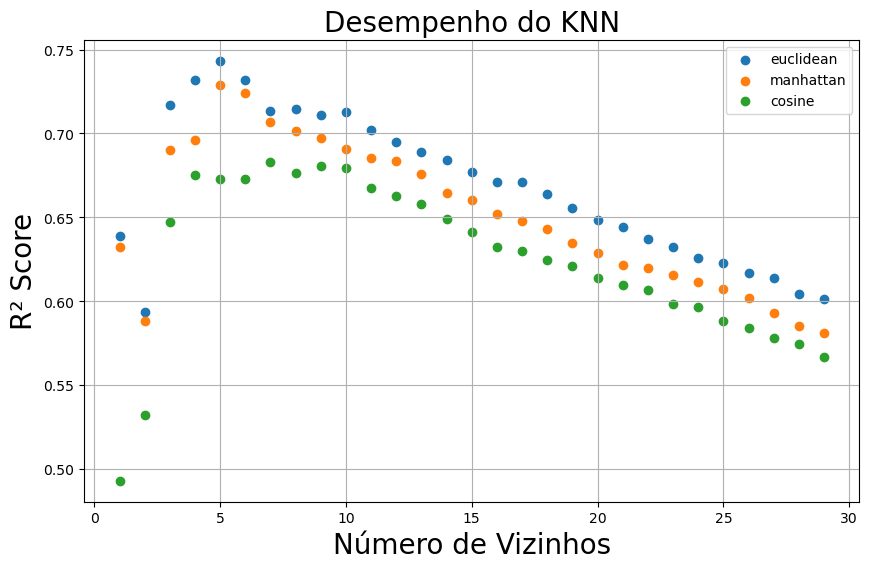

In [139]:
from sklearn.neighbors import KNeighborsRegressor

dist = ["euclidean", "manhattan", "cosine"]
n_neighbors = range(1, 30)

resultados = {d: [] for d in dist} 

for i in dist:
    for j in n_neighbors:
        knn = KNeighborsRegressor(n_neighbors=j, metric=i)
        resultados_knn = cross_val_score(knn, x_train, y_train, cv=5, scoring="r2")
        score = resultados_knn.mean()
        resultados[i].append(score)


plt.figure(figsize=(10, 6))
for d in dist:
    plt.scatter(list(n_neighbors), resultados[d], label=d)

plt.title('Desempenho do KNN', fontsize=20)
plt.xlabel('Número de Vizinhos', fontsize=20)
plt.ylabel('R² Score', fontsize=20)
plt.legend()
plt.grid(True)

plt.show()

Apesar do diferente comportamento, vemos que a medida de distância Euclideana tem um melhor desempenho aqui também, utilizando 5 vizinhos.

In [141]:
knn = KNeighborsRegressor(n_neighbors=5, metric="euclidean")

model_knn = knn.fit(x_train,y_train)

y_pred_knn = model_knn.predict(x_test)

score_knn = r2_score(y_pred_knn,y_test)

print("Variabilidade para o K vizinhos", score_knn)

Variabilidade para o K vizinhos 0.7969227771061377


Com resultado do KNN, vemos que as mudanças não auxiliaram na leitura dos dados.

Vamos analisar o comportamento do modelo Random Forest.

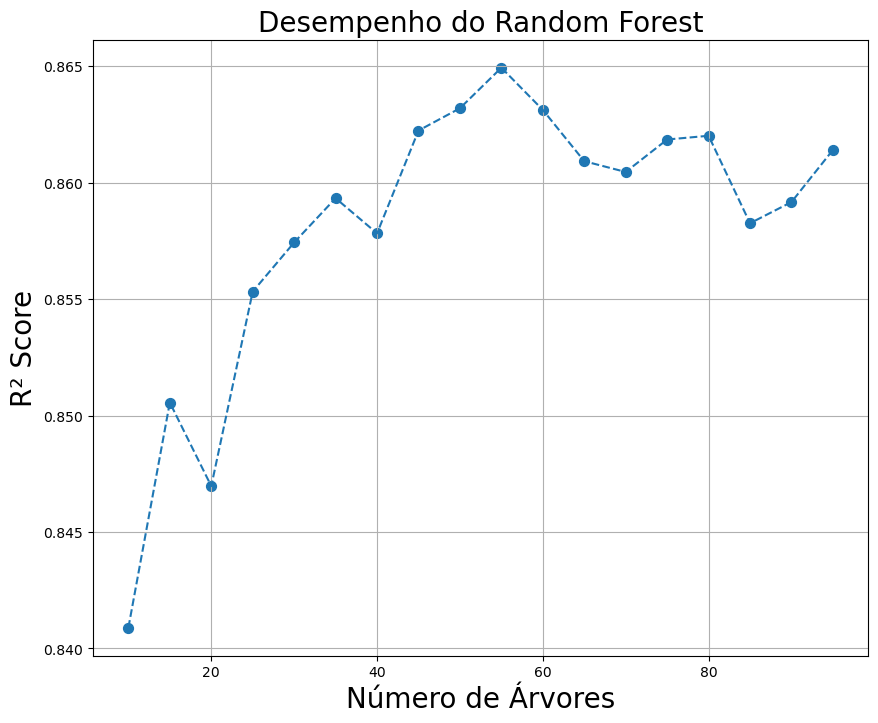

In [142]:
from sklearn.ensemble import RandomForestRegressor

n_estimator = range(10,100,5)
score_rf = []

for i in n_estimator:

    rf = RandomForestRegressor(n_estimators=i, random_state=30)
    resultados_rf = cross_val_score(rf, x_train, y_train, cv=5, scoring="r2")

    score_rf.append(resultados_rf.mean())

plt.figure(figsize=(10,8))
plt.scatter(n_estimator, score_rf, s=50,marker='o')
plt.plot(n_estimator, score_rf, "--")
plt.title("Desempenho do Random Forest", fontsize=20)
plt.ylabel("R² Score", fontsize=20)
plt.xlabel("Número de Árvores", fontsize=20)
plt.grid(True)
plt.show()


Para os dados novos, vemos que o número de árvores que alcançou um melhor desempenho foi 55, então testamos este modelo para os dados de teste.

In [144]:
rf = RandomForestRegressor(n_estimators=60, random_state=30)

model_rf = rf.fit(x_train,y_train)

y_pred_rf = model_rf.predict(x_test)

score_rf = r2_score(y_test, y_pred_rf)

print("Variabilidade do Random Forest", score_rf)

Variabilidade do Random Forest 0.9644860986076739


A predição do modelo melhorou $\approx 0,0005$ comparado ao anterior, podemos analisar a importância das colunas.

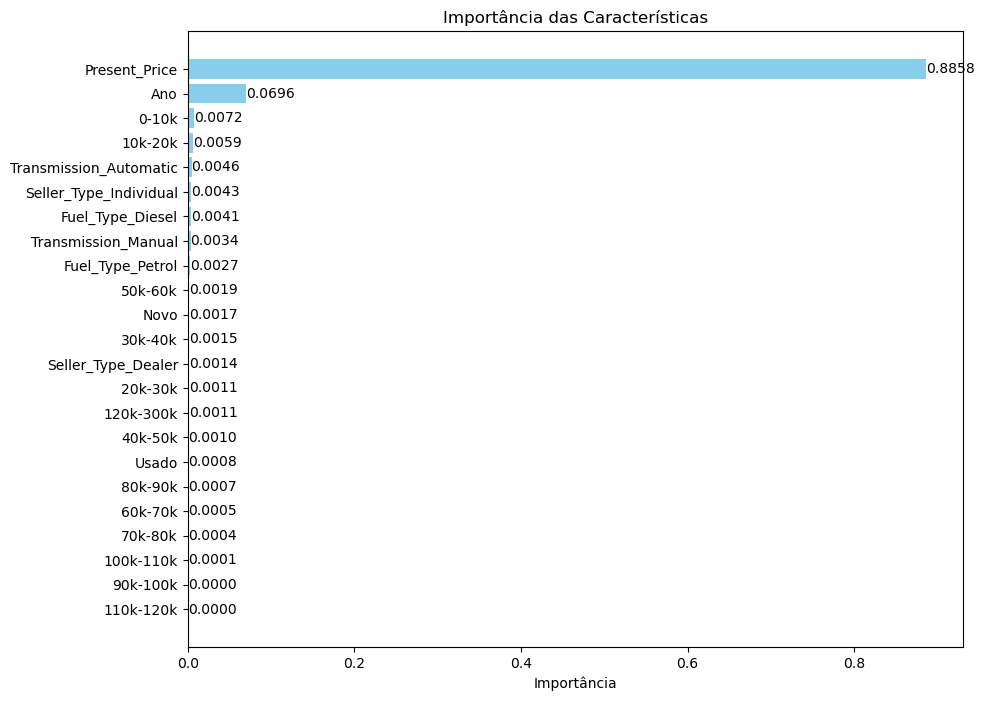

In [145]:
f_importance = model_rf.feature_importances_

df_aux = df.drop("Selling_Price", axis=1)
features = df_aux.columns

lista = list(zip(features, f_importance))
lista.sort(key=lambda x: x[1])  # Ordenando a lista pelo valor da importância

features_ordered = [x[0] for x in lista]
importance_ordered = [x[1] for x in lista]

color = ["lightseagreen"]

plt.figure(figsize=(10, 8))
bars = plt.barh(features_ordered, importance_ordered, color='skyblue')
plt.xlabel('Importância')
plt.title('Importância das Características')

# Adicionando os valores das importâncias nas barras
for index, value in enumerate(importance_ordered):
    plt.text(value, index, f'{value:.4f}', ha='left', va='center', fontsize=10, color='black')

plt.show()

Podemos testar excluir algumas colunas que demostram estar sendo "inúteis" para o modelo.

In [146]:
df_test = df.drop(["20k-30k", "120k-300k", "40k-50k", "80k-90k", "60k-70k", "70k-80k", "100k-110k", "90k-100k", "110k-120k", "Seller_Type_Dealer", "Usado"], axis=1)
df_test.head()

,Selling_Price,Present_Price,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Seller_Type_Individual,Novo,Ano,0-10k,10k-20k,30k-40k,50k-60k
0,3.35,5.59,0,1,0,1,0,1,2014,0,0,0,0
1,4.75,9.54,1,0,0,1,0,1,2013,0,0,0,0
2,7.25,9.85,0,1,0,1,0,1,2017,1,0,0,0
3,2.85,4.15,0,1,0,1,0,1,2011,1,0,0,0
4,4.60,6.87,1,0,0,1,0,1,2014,0,0,0,0


In [147]:
data = df_test.to_numpy()
nrow, ncol = data.shape

X = data[:, 1:ncol]
y = data[:,0]

In [148]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

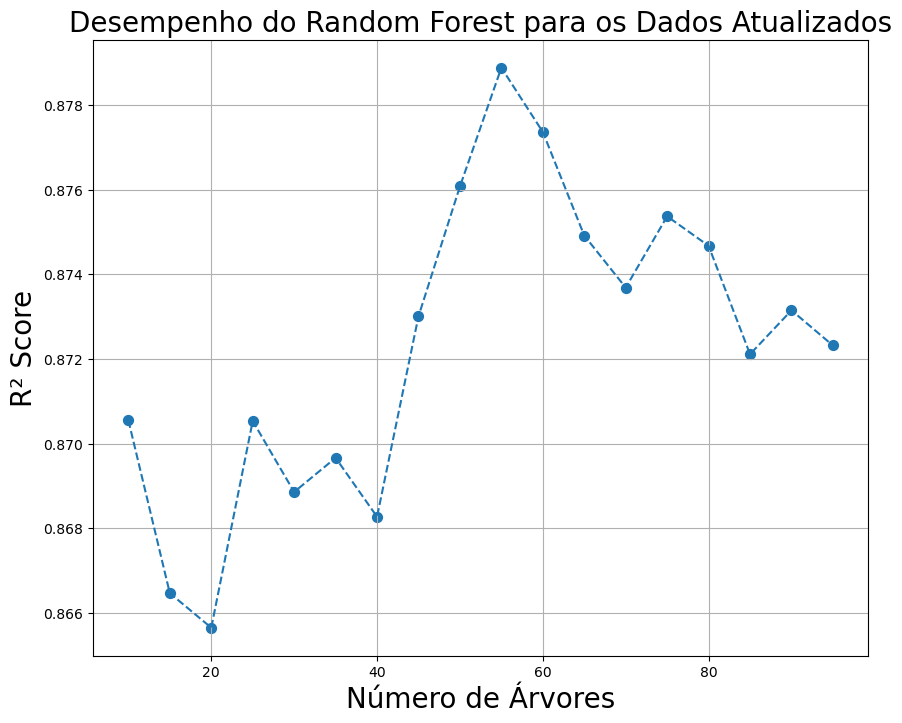

In [149]:
from sklearn.ensemble import RandomForestRegressor

n_estimator = range(10,100,5)
score_rf = []

for i in n_estimator:

    rf = RandomForestRegressor(n_estimators=i, random_state=30)
    resultados_rf = cross_val_score(rf, x_train, y_train, cv=5, scoring="r2")

    score_rf.append(resultados_rf.mean())

plt.figure(figsize=(10,8))
plt.scatter(n_estimator, score_rf, s=50,marker='o')
plt.plot(n_estimator, score_rf, "--")
plt.title("Desempenho do Random Forest para os Dados Atualizados", fontsize=20)
plt.ylabel("R² Score", fontsize=20)
plt.xlabel("Número de Árvores", fontsize=20)
plt.grid(True)
plt.show()

In [150]:
rf = RandomForestRegressor(n_estimators=60, random_state=30)

model_rf_teste = rf.fit(x_train,y_train)

y_pred_rf = model_rf_teste.predict(x_test)

score_rf = r2_score(y_test, y_pred_rf)

print("Variabilidade do Random Forest", score_rf)

Variabilidade do Random Forest 0.9628989065336174


Obtemos que o modelo se comportou pior que comparado ao conjunto anterior. Então, até o momento o melhor modelo que geramos foi o Random Forest para o ajuste na coluna de quilometragem. Uma possível mudança nos dados, é a exclusão dos outliers detectados no tratamento. 

# Ajuste dos Outliers

In [6]:
df = df[df["Selling_Price"] < 13.65]

In [7]:
data = df.to_numpy()
nrow, ncol = data.shape

X = data[:, 1:ncol]
y = data[:,0]

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [11]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=60, random_state=30)

model_rf_teste = rf.fit(x_train,y_train)

y_pred_rf = model_rf_teste.predict(x_test)

score_rf = r2_score(y_test, y_pred_rf)

print("Variabilidade do Random Forest", score_rf)

Variabilidade do Random Forest 0.9115820201488942


O modelo piorou seu desempenho com o tratamento dos outliers, evidenciando que por mais que os preços sejam diferentes, talvez os dados dos carros mais caros auxiliem na predição.

In [12]:
import warnings

warnings.filterwarnings("ignore")

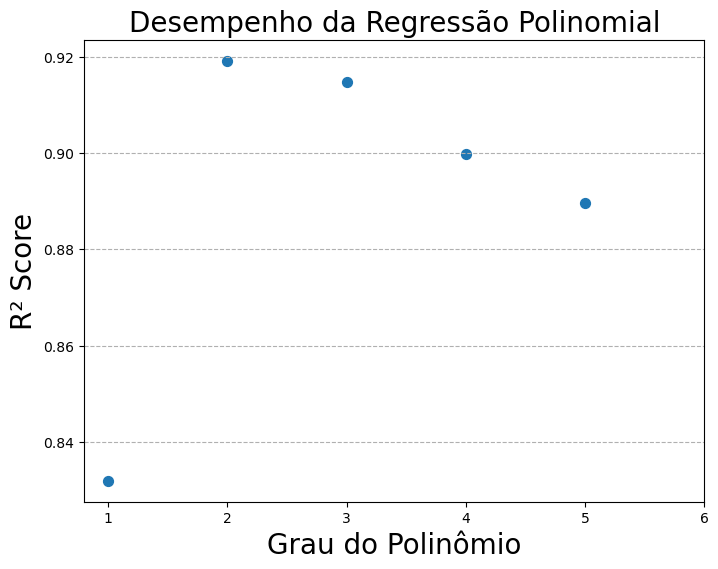

In [157]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

lnr = Ridge()
score = []
resultados = []
grau = np.arange(1,6,1)

for i in grau:
     resultados = []
     poly_rg = PolynomialFeatures(degree=i, include_bias=False)
     x_poly = poly_rg.fit_transform(x_train)
     resultados_lnr = (cross_val_score(lnr, x_poly, y_train, cv=5, scoring="r2"))
     for i in resultados_lnr:
        if i < 1 and i > 0:
            resultados.append(i)
     score.append(np.mean(resultados))


plt.figure(figsize=(8, 6))
plt.scatter(grau,score, s=50)
plt.title('Desempenho da Regressão Polinomial', fontsize=20)
plt.xlabel('Grau do Polinômio', fontsize=20)
plt.ylabel('R² Score', fontsize=20)
plt.xticks(np.arange(1,7, 1))
plt.grid(True, axis="y", linestyle= "--" )

plt.show()


Vemos que o grau do polinômio de melhor performance nesse caso foi 2.

In [158]:
from sklearn.linear_model import Ridge

poly_rg = PolynomialFeatures(degree=2)
lnr = Ridge()
x_poly = poly_rg.fit_transform(x_train)
model = lnr.fit(x_poly,y_train)

y_pred = model.predict(poly_rg.fit_transform(x_test))

score = r2_score(y_test, y_pred)

print(score)

0.8765191624992922


O modelo de Regressão Polinomial também não melhorou com as mudanças dos dados.

Concluímos nesta etapa, que os melhores modelos para os ajustes realizados são Random Forest e Polynomial Regression, além disso, conseguimos melhorar o desempenho do Random Forest em $\approx 0,0005$ e em $\approx 0,03$ o Polinomial Regression, ajustando as faixas de quilometragem dos carros.

In [106]:
df.to_csv("dados_ajustes.csv", index=False)